<a href="https://colab.research.google.com/github/luke-t-menezes/pxrd_statistics_tutorial/blob/main/pxrd_samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# Download a data files containing 2theta and intensity
data_urls = ['https://raw.githubusercontent.com/luke-t-menezes/pxrd_statistics_tutorial/main/data/example1.csv',
             'https://raw.githubusercontent.com/luke-t-menezes/pxrd_statistics_tutorial/main/data/example2.csv',
             'https://raw.githubusercontent.com/luke-t-menezes/pxrd_statistics_tutorial/main/data/example3.csv',
             'https://raw.githubusercontent.com/luke-t-menezes/pxrd_statistics_tutorial/main/data/example4.csv',
             'https://raw.githubusercontent.com/luke-t-menezes/pxrd_statistics_tutorial/main/data/example5.csv',
             'https://raw.githubusercontent.com/luke-t-menezes/pxrd_statistics_tutorial/main/data/example6.csv',
             'https://raw.githubusercontent.com/luke-t-menezes/pxrd_statistics_tutorial/main/data/example7.csv',
             'https://raw.githubusercontent.com/luke-t-menezes/pxrd_statistics_tutorial/main/data/example8.csv',
             'https://raw.githubusercontent.com/luke-t-menezes/pxrd_statistics_tutorial/main/data/example9.csv',
             'https://raw.githubusercontent.com/luke-t-menezes/pxrd_statistics_tutorial/main/data/example10.csv',]

stages = ['example1.csv',
          'example2.csv',
          'example3.csv',
          'example4.csv',
          'example5.csv',
          'example6.csv',
          'example7.csv',
          'example8.csv',
          'example9.csv',
          'example10.csv']


for url, stage in zip(data_urls, stages):
  !wget -O {stage} {url}

--2026-01-15 18:03:08--  https://raw.githubusercontent.com/luke-t-menezes/pxrd_statistics_tutorial/main/data/example1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 695807 (679K) [text/plain]
Saving to: ‘example1.csv’

example1.csv        100%[===================>] 679.50K  --.-KB/s    in 0.05s   

2026-01-15 18:03:08 (12.8 MB/s) - ‘example1.csv’ saved [695807/695807]

--2026-01-15 18:03:08--  https://raw.githubusercontent.com/luke-t-menezes/pxrd_statistics_tutorial/main/data/example2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 

In [10]:
# A handy plotting function to visualize the PXRD data we've just downloaded.
def plot_pxrd(filename:str, figsize:tuple=(12, 6), xlim:tuple=(20, 80)):
    # Read the data
    df = pd.read_csv(filename, sep=',')

    # Get column names
    ttheta_col = [col for col in df.columns if '2theta' in col][0]

    # Create single plot
    fig, ax = plt.subplots(figsize=figsize)

    # Plot: Observed, Calculated, Background, and Difference
    ax.plot(df[ttheta_col], df['obs'], 'ko', markersize=2, label='Observed', alpha=0.6)
    ax.plot(df[ttheta_col], df['calc'], 'r-', linewidth=2, label='Calculated')
    ax.plot(df[ttheta_col], df['bkg'], 'g-', linewidth=2, label='Background')
    ax.plot(df[ttheta_col], df['diff'], 'b-', linewidth=2, label='Difference')

    ax.set_xlabel('2θ (degrees)', fontsize=12)
    ax.set_ylabel('Intensity (counts)', fontsize=12)
    ax.legend(loc='upper right', fontsize=10)
    ax.set_xlim(xlim)

    plt.tight_layout()
    plt.show()

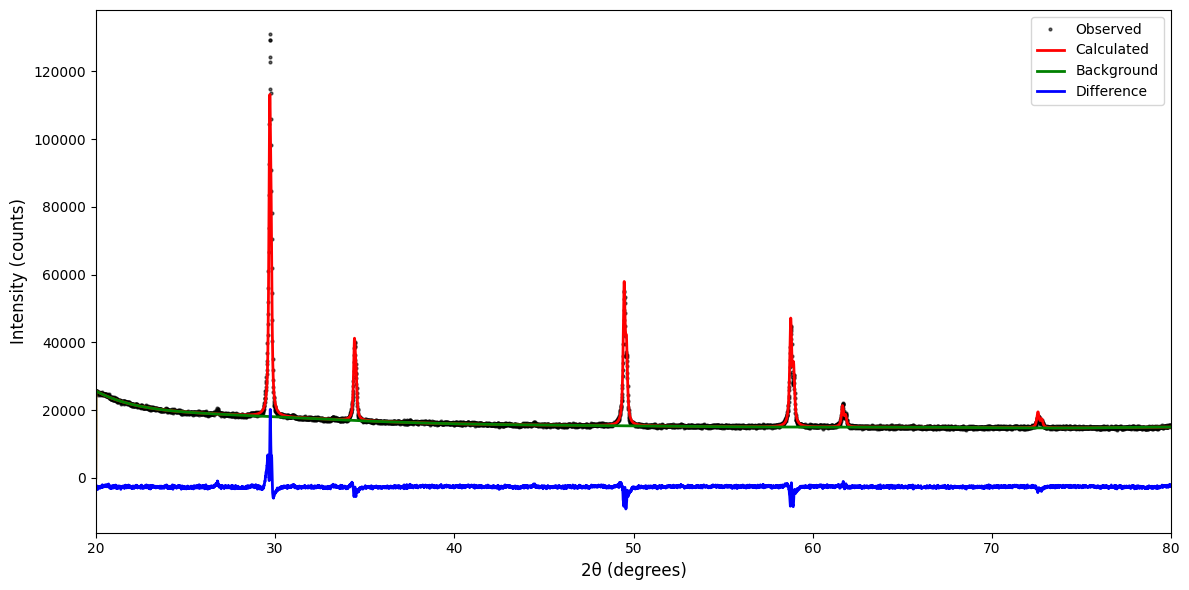

In [11]:
# Example 1: Baseline fit of the a sample of Gd1.5Mn0.25Zr2.25O7 with the defect-fluorite structure type.
plot_pxrd('example1.csv')

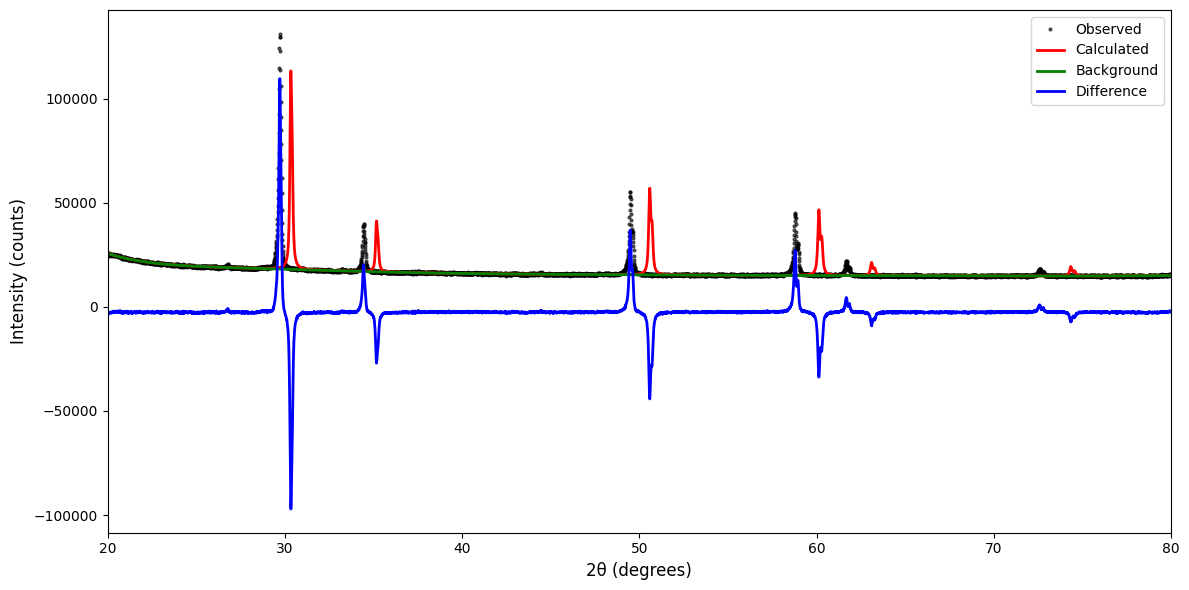

In [12]:
# Example 2: Decreasing the lattice parameter from 5.2 Å to 5.1 Å.
#            If the lattice parameter had increased which way would the peaks shift?
plot_pxrd('example2.csv')

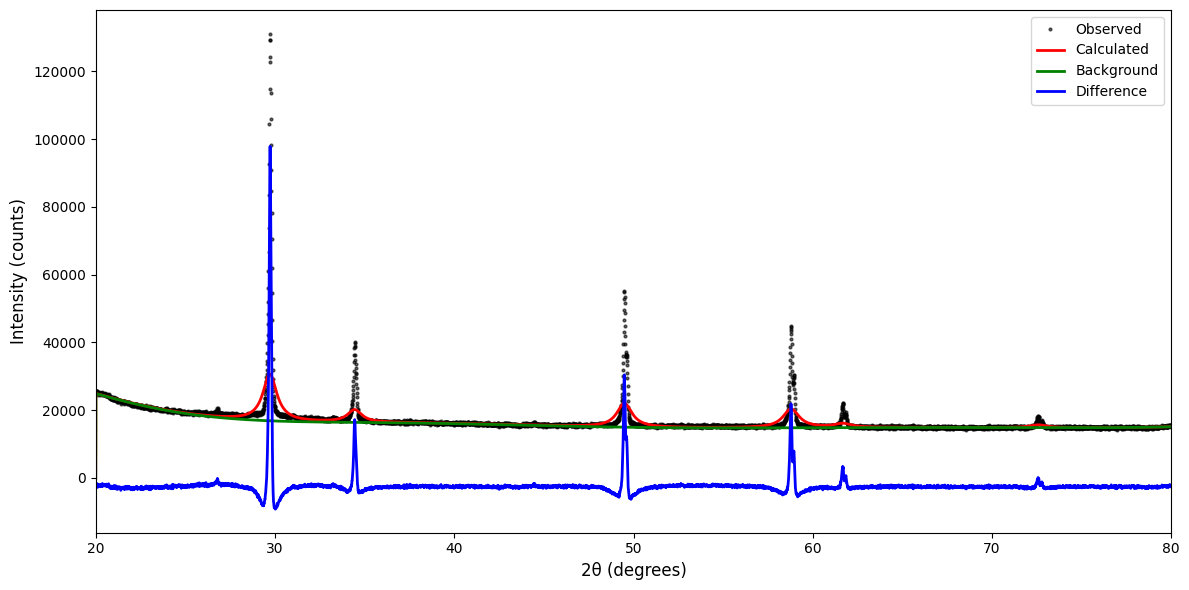

In [13]:
# Example 3: Decreasing the crystallite size.
#            The crystallite size in the calculated pattern is 10 nm.
plot_pxrd('example3.csv')

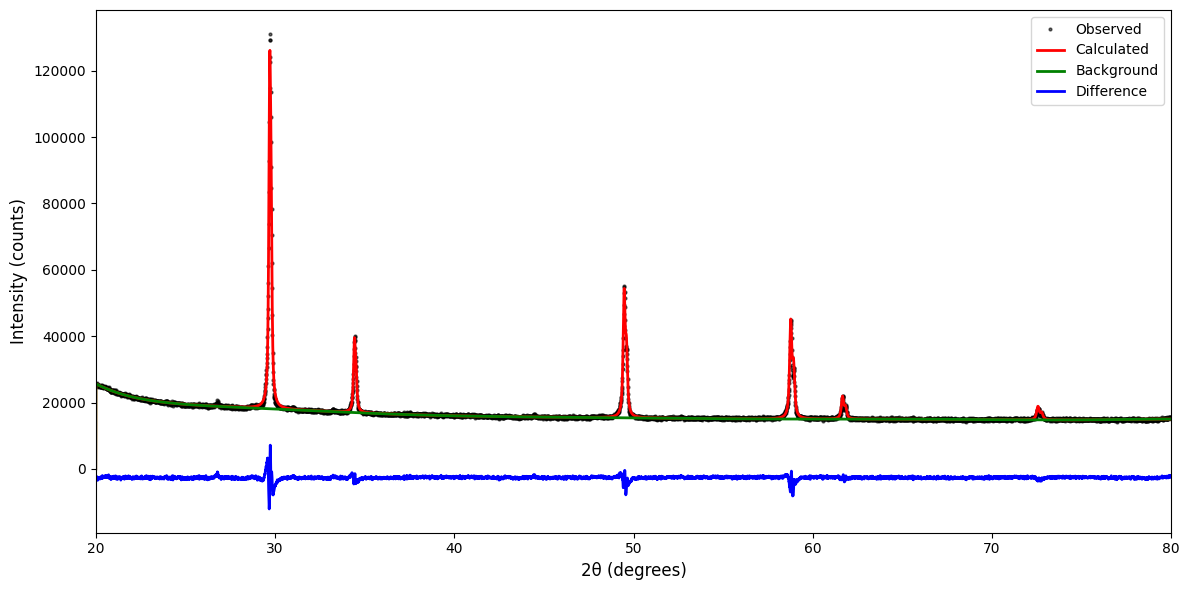

In [14]:
# Example 4: Introduce preferred orientation in the crystallites.
#            One assumpetion in PXRD is that after you grind the sample all of the lattice planes are equally represented.
#            If some are displayed more than others than the peaks corresponding to those planes will have greater intensity
plot_pxrd('example4.csv')

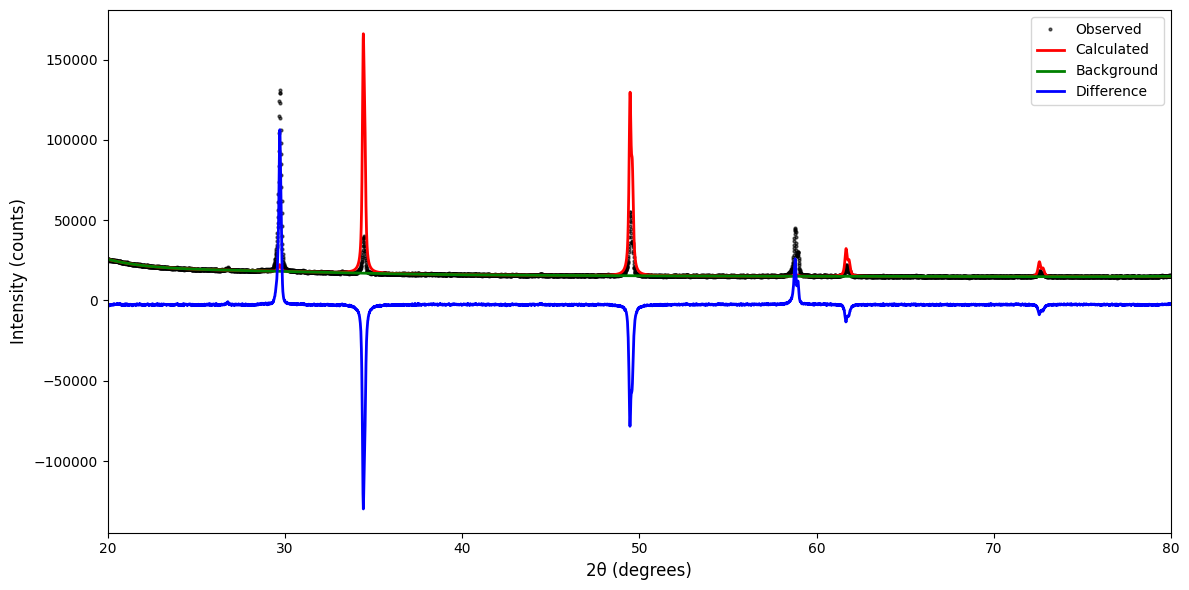

In [15]:
# Example 5: Swap out the elements in the unit cell
#            Here the Gd, Mn, Zr, and O in the unit cell have been swapped out with random other elements.
#            Gd (Z=64) -> Al (Z=13)
#            Mn (Z=25) -> I (Z=53)
#            Zr (Z=40) -> Be (Z=4)
#            O (Z=0) -> Gd (Z=64)
plot_pxrd('example5.csv')

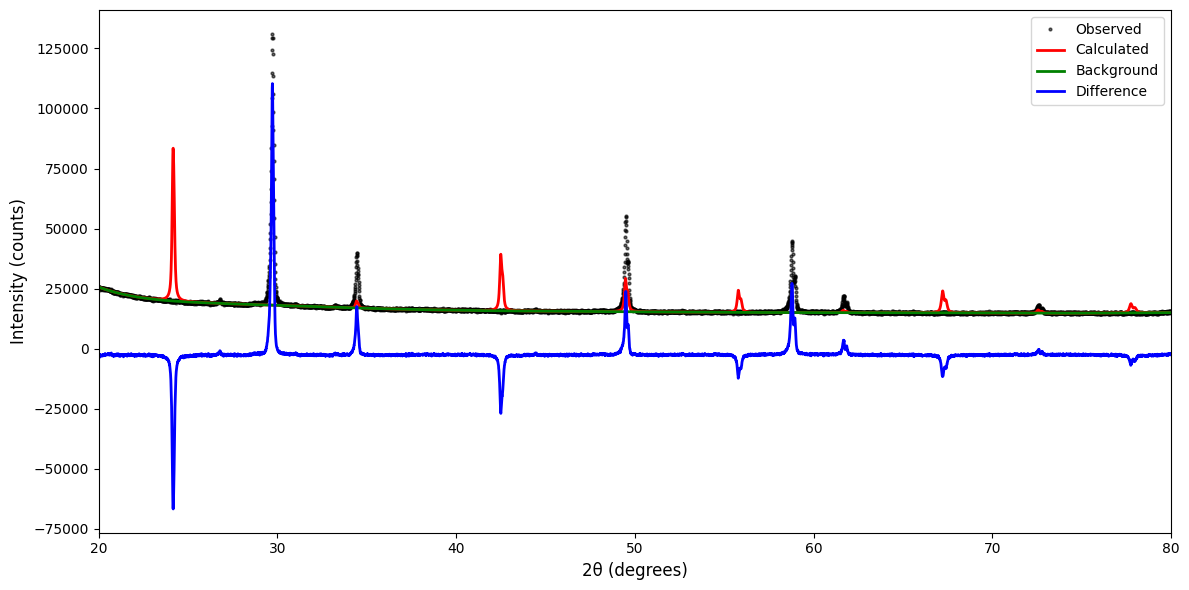

In [16]:
# Example 6: Lower symmetry
#            The original structure is face-centered cubic. The symmetry has been decreased to body-centered cubic.
plot_pxrd('example6.csv')

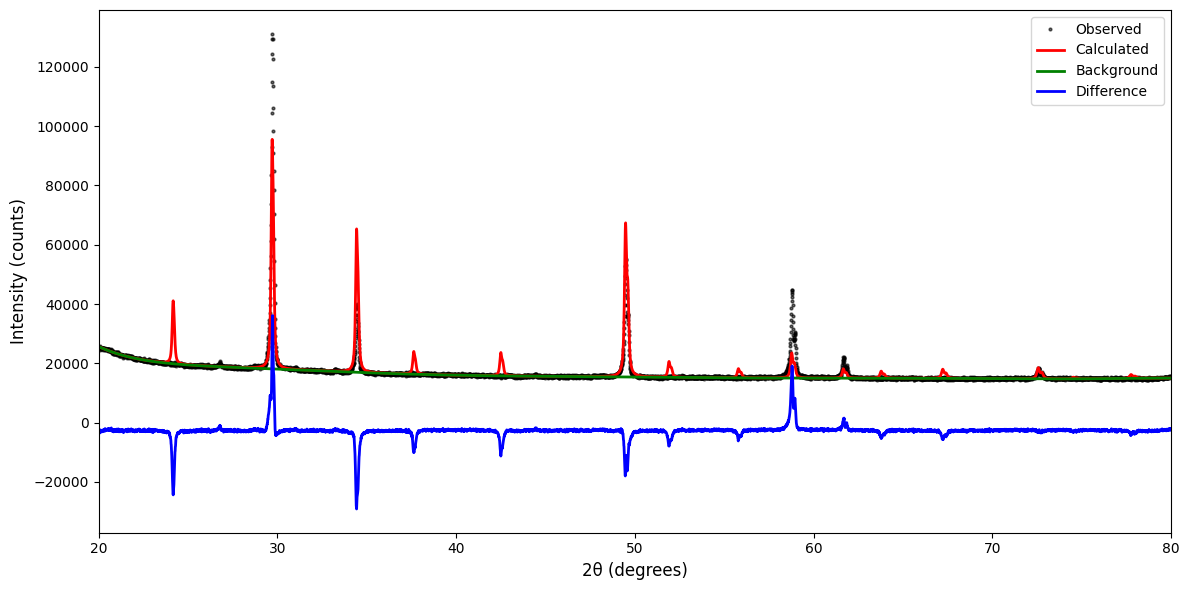

In [17]:
# Example 7: Decrease the symmetry with a super-cell
#            The original unit cell is small, but high-symmetry.
#            We can check for long-range order by increasing the unit cell size and lowering the symmetry.
plot_pxrd('example7.csv')

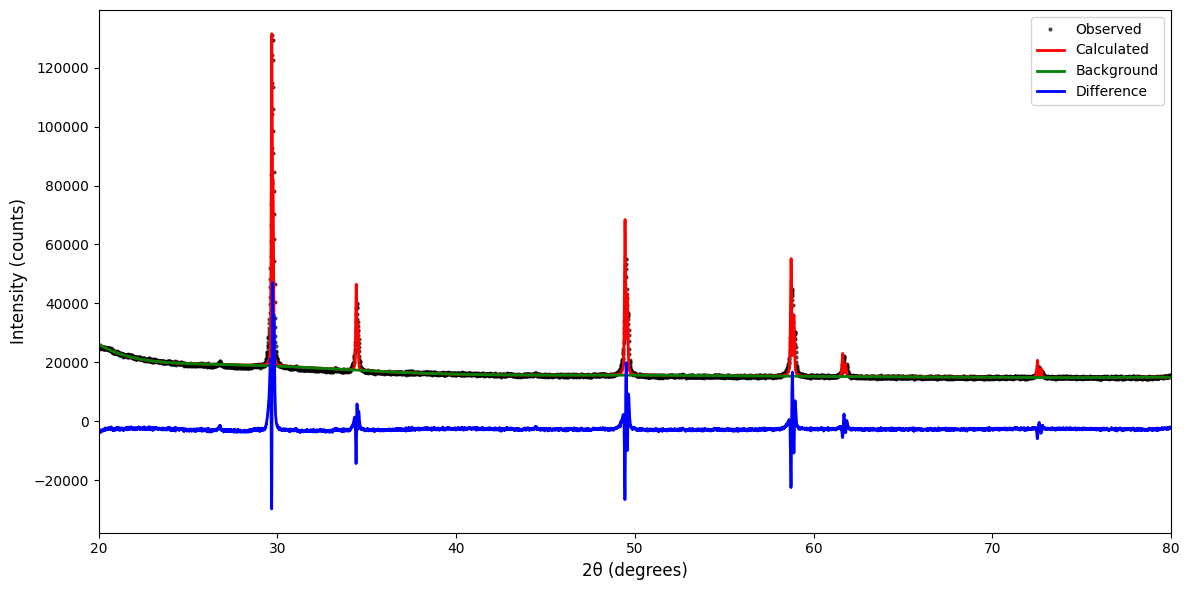

In [18]:
# Example 8: Highly-crystalline material and sharp peaks
#            The crystallite size has been increased to 1000 nm
plot_pxrd('example8.csv')

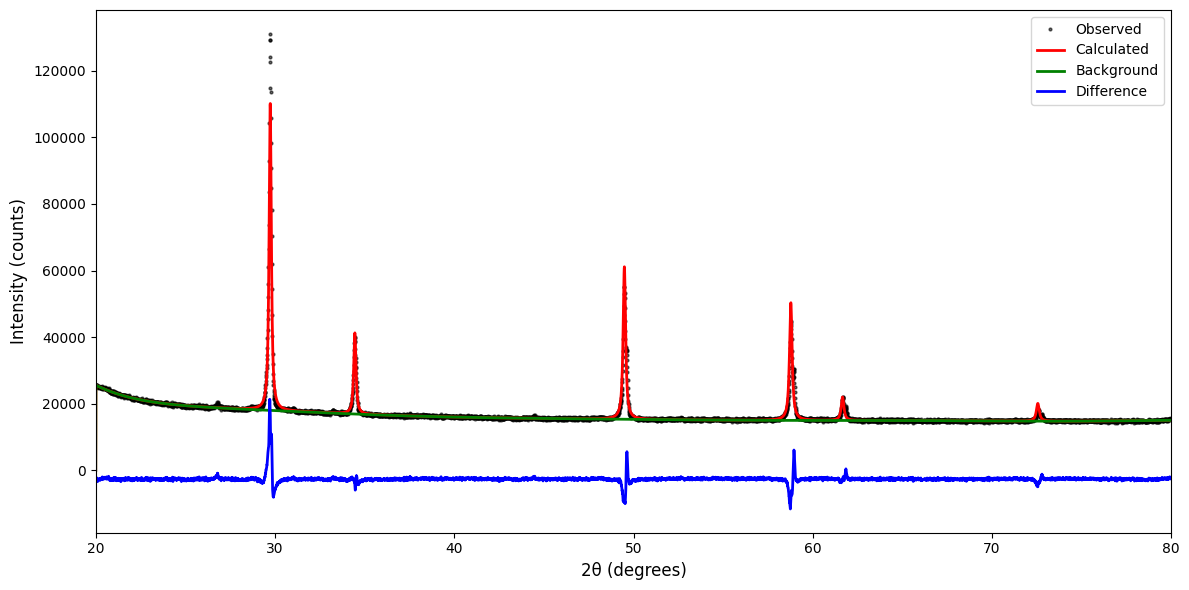

In [19]:
# Example 9: Only fit Kα1 (exclude Kα2)
#            Lab X-rays from a Cu source are produced with two very similiar wavelengths,1.5406 Å (Kα1) and 1.5444 Å (Kα2).
#            Each produces their own set of diffraction peaks.
#            This is what it would look like if you exclude 1.5444 Å (Kα2) from the simulation.
plot_pxrd('example9.csv')

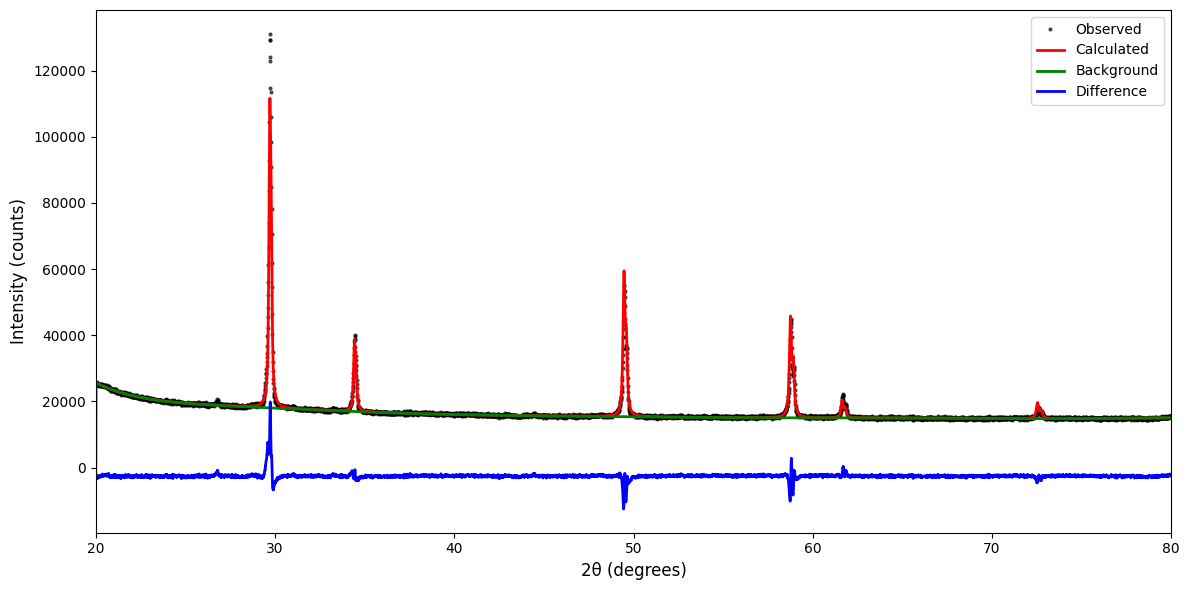

In [20]:
# Example 10: Swap the elements in the unit cell with neighboring elements
#             Compare to example 5. All of the elements are still swapped,
#             but because the new elements have basically the same number of electrons they are pretty much indistinguishable in XRD.
#            Gd (Z=64) -> Eu (Z=63)
#            Mn (Z=25) -> Cr (Z=24)
#            Zr (Z=40) -> Y (Z=39)
#            O (Z=0) -> F (Z=9)
plot_pxrd('example10.csv')